In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential as seq
from tensorflow.keras.layers import Dense as den
from tensorflow.keras.metrics import RootMeanSquaredError as rmse

In [2]:
auth.authenticate_user()
creds,_=default()
gc=gspread.authorize(creds)

worksheet=gc.open('doc').sheet1
data = worksheet.get_all_values()

dataset1 = pd.DataFrame(data[1:],columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})
dataset1.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [3]:
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [4]:
scaler = MinMaxScaler()
scaler.fit(X)
X_n = scaler.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_n,y,test_size = 0.3,random_state = 3)

In [5]:
my_model = seq([
    den(9,activation = 'relu',input_shape=[1]),
    den(16,activation = 'relu'),
    den(1),
])

my_model.compile(optimizer = 'rmsprop',loss = 'mse')

my_model.fit(x_train,y_train,epochs=1000)
my_model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 14455.7012
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 14452.7275
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 14450.5361
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 14448.6787
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 14447.0137
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 14445.4736
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 14444.0215
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 14442.6357
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 14441.3018
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 14440.0049
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step - loss: 14438.7412
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 14437.50

<Axes: >

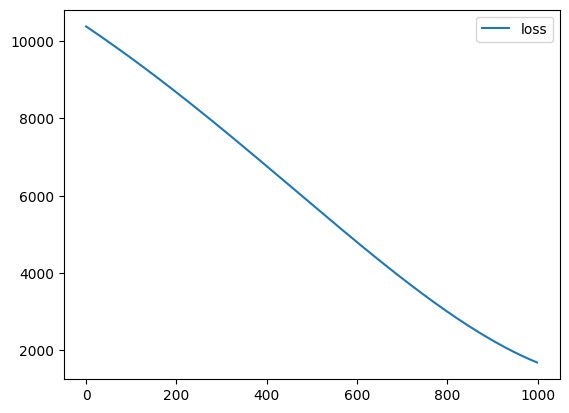

In [6]:
loss_plot = pd.DataFrame(my_model.history.history)
loss_plot.plot()

In [7]:
error = rmse()
pred = my_model.predict(x_test)
error(y_test,pred)

1/1 [==============================] - 0s 103ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=50.03842>

In [8]:
x_n1 = [[7]]
x_n_n = scaler.transform(x_n1)
my_model.predict(x_n_n)

1/1 [==============================] - 0s 23ms/step


array([[82.00228]], dtype=float32)